Carte 8x8 utilisée :
FFFFFFFF
SFFFFFFF
FFFFFFFF
FFFFFFFF
FFFFFFFF
FFFFFFFF
FHHHHHFF
FFFFFFFG

Légende: S=Start, F=Sol gelé, H=Trou, G=Goal
Taille: 8x8 = 64 états possibles

=== ENTRAÎNEMENT Q-LEARNING 8x8 ===
Q-Learning - Épisode 200, Succès: 10.0%, Reward moyen: 0.100
Q-Learning - Épisode 400, Succès: 40.0%, Reward moyen: 0.400
Q-Learning - Épisode 600, Succès: 46.0%, Reward moyen: 0.460
Q-Learning - Épisode 800, Succès: 62.0%, Reward moyen: 0.620
Q-Learning - Épisode 1000, Succès: 77.0%, Reward moyen: 0.770
Q-Learning - Épisode 1200, Succès: 90.0%, Reward moyen: 0.900
Q-Learning - Épisode 1400, Succès: 90.0%, Reward moyen: 0.900
Q-Learning - Épisode 1600, Succès: 94.0%, Reward moyen: 0.940
Q-Learning - Épisode 1800, Succès: 98.0%, Reward moyen: 0.980
Q-Learning - Épisode 2000, Succès: 99.0%, Reward moyen: 0.990

=== ENTRAÎNEMENT SARSA 8x8 ===
SARSA - Épisode 200, Succès: 15.0%, Reward moyen: 0.150
SARSA - Épisode 400, Succès: 28.0%, Reward moyen: 0.280
SARSA - Épisode 600, Succès: 54

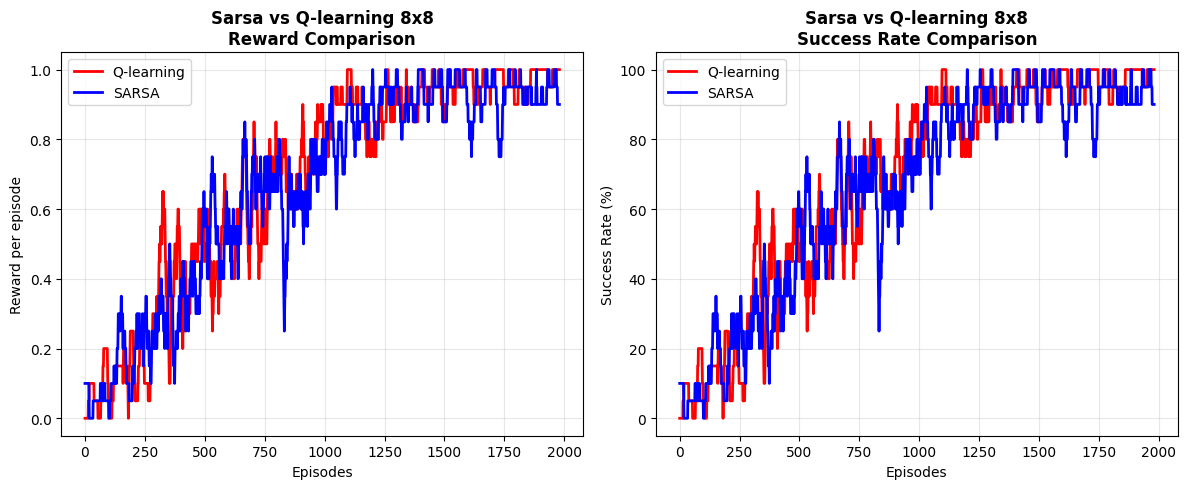


=== GÉNÉRATION DES GRAPHIQUES CARTE 8x8 (S→G) ===
Position S: (1, 0) (état 8)
Position G: (7, 7) (état 63)


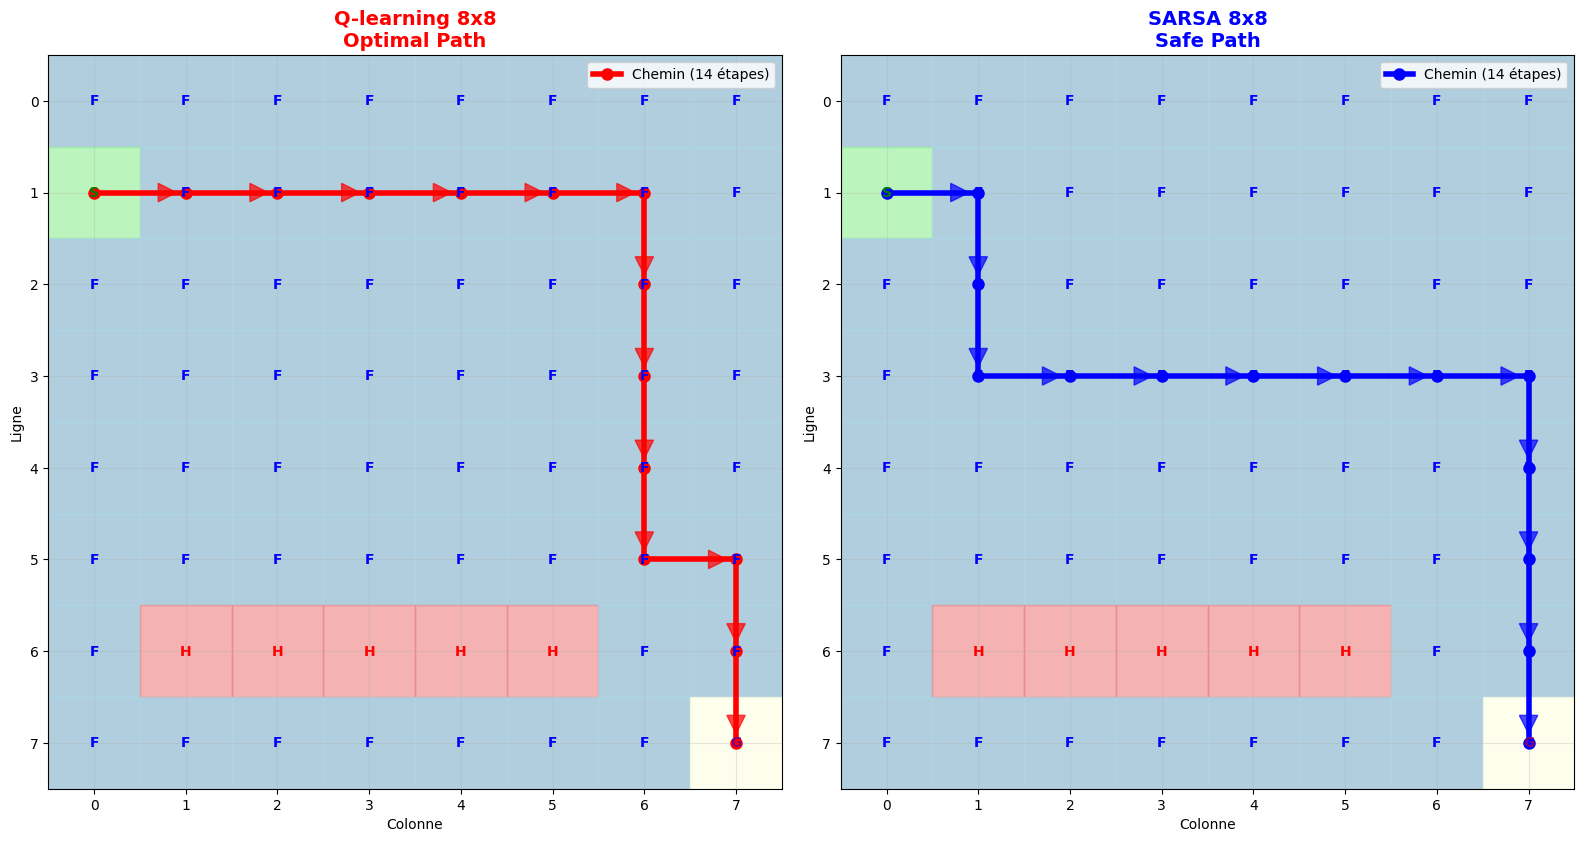


=== CHEMINS COMPLETS S → G ===
Position S: état 8 (ligne 1, colonne 0)
Position G: état 63 (ligne 7, colonne 7)

Chemin Q-Learning (S→G):
  START: état  8 → position (1,0) [S] 
  Step 1: état  9 → position (1,1) [F] → RIGHT
  Step 2: état 10 → position (1,2) [F] → RIGHT
  Step 3: état 11 → position (1,3) [F] → RIGHT
  Step 4: état 12 → position (1,4) [F] → RIGHT
  Step 5: état 13 → position (1,5) [F] → RIGHT
  Step 6: état 14 → position (1,6) [F] → RIGHT
  Step 7: état 22 → position (2,6) [F] ↓ DOWN
  Step 8: état 30 → position (3,6) [F] ↓ DOWN
  Step 9: état 38 → position (4,6) [F] ↓ DOWN
  Step 10: état 46 → position (5,6) [F] ↓ DOWN
  Step 11: état 47 → position (5,7) [F] → RIGHT
  Step 12: état 55 → position (6,7) [F] ↓ DOWN
  GOAL: état 63 → position (7,7) [G] ↓ DOWN

Résultat Q-Learning: SUCCÈS en 14 étapes

Chemin SARSA (S→G):
  START: état  8 → position (1,0) [S] 
  Step 1: état  9 → position (1,1) [F] → RIGHT
  Step 2: état 17 → position (2,1) [F] ↓ DOWN
  Step 3: état 25 → p

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gymnasium as gym
import random
from gymnasium.envs.toy_text.frozen_lake import generate_random_map

# -----------------------------
# CONFIGURATION DE LA CARTE 8x8
# -----------------------------

CUSTOM_MAP = [
    "FFFFFFFF",
    "SFFFFFFF",
    "FFFFFFFF",
    "FFFFFFFF",
    "FFFFFFFF",
    "FFFFFFFF",
    "FHHHHHFF",
    "FFFFFFFG"
]

# -----------------------------
# PARAMÈTRES COMMUNS POUR 8x8
# -----------------------------

alpha = 0.1       # Taux d'apprentissage
gamma = 0.95      # Facteur d'actualisation
epsilon = 1.0     # Exploration initiale
epsilon_decay = 0.998  # Décroissance plus lente pour 8x8
epsilon_min = 0.01
episodes = 2000   # Plus d'épisodes pour 8x8
max_steps = 200   # Plus d'étapes pour 8x8
test_episodes = 10

print("Carte 8x8 utilisée :")
for row in CUSTOM_MAP:
    print(row)
print("\nLégende: S=Start, F=Sol gelé, H=Trou, G=Goal")
print(f"Taille: 8x8 = {8*8} états possibles\n")

# -----------------------------
# 1) Q-LEARNING 8x8
# -----------------------------

print("=== ENTRAÎNEMENT Q-LEARNING 8x8 ===")
env_q = gym.make("FrozenLake-v1", desc=CUSTOM_MAP, is_slippery=True)

# Initialisation de la Q-table pour Q-learning
q_table_q = np.zeros((env_q.observation_space.n, env_q.action_space.n))

def choose_action_q(state):
    if random.uniform(0, 1) < current_epsilon:
        return env_q.action_space.sample()
    else:
        return np.argmax(q_table_q[state, :])

# Réinitialisation des paramètres pour Q-learning
current_epsilon = epsilon
q_rewards = []
q_successes = []

for episode in range(episodes):
    state, _ = env_q.reset()
    done = False
    total_reward = 0
    success = 0

    for step in range(max_steps):
        action = choose_action_q(state)
        next_state, reward, done, truncated, _ = env_q.step(action)

        # MISE À JOUR Q-LEARNING (max)
        old_value = q_table_q[state, action]
        next_max = np.max(q_table_q[next_state, :]) if not done else 0
        q_table_q[state, action] = old_value + alpha * (reward + gamma * next_max - old_value)

        state = next_state
        total_reward += reward

        if done:
            if reward == 1:
                success = 1
            break

    # Décroissance d'epsilon
    current_epsilon = max(epsilon_min, current_epsilon * epsilon_decay)
    q_rewards.append(total_reward)
    q_successes.append(success)

    if (episode + 1) % 200 == 0:
        avg_reward = np.mean(q_rewards[-100:])
        success_rate = np.mean(q_successes[-100:]) * 100
        print(f"Q-Learning - Épisode {episode + 1}, Succès: {success_rate:.1f}%, Reward moyen: {avg_reward:.3f}")

env_q.close()

# -----------------------------
# 2) SARSA 8x8
# -----------------------------

print("\n=== ENTRAÎNEMENT SARSA 8x8 ===")
env_sarsa = gym.make("FrozenLake-v1", desc=CUSTOM_MAP, is_slippery=True)

# Initialisation de la Q-table pour SARSA
q_table_sarsa = np.zeros((env_sarsa.observation_space.n, env_sarsa.action_space.n))

def choose_action_sarsa(state):
    if random.uniform(0, 1) < current_epsilon:
        return env_sarsa.action_space.sample()
    else:
        return np.argmax(q_table_sarsa[state, :])

# Réinitialisation des paramètres pour SARSA
current_epsilon = epsilon
sarsa_rewards = []
sarsa_successes = []

for episode in range(episodes):
    state, _ = env_sarsa.reset()
    done = False
    total_reward = 0
    success = 0

    # SARSA: choisir la première action
    action = choose_action_sarsa(state)

    for step in range(max_steps):
        next_state, reward, done, truncated, _ = env_sarsa.step(action)

        # SARSA: choisir la prochaine action selon la politique
        next_action = choose_action_sarsa(next_state)

        # MISE À JOUR SARSA (prochaine action réelle)
        current_q = q_table_sarsa[state, action]
        next_q = q_table_sarsa[next_state, next_action] if not done else 0

        q_table_sarsa[state, action] = current_q + alpha * (reward + gamma * next_q - current_q)

        state = next_state
        action = next_action
        total_reward += reward

        if done:
            if reward == 1:
                success = 1
            break

    # Décroissance d'epsilon
    current_epsilon = max(epsilon_min, current_epsilon * epsilon_decay)
    sarsa_rewards.append(total_reward)
    sarsa_successes.append(success)

    if (episode + 1) % 200 == 0:
        avg_reward = np.mean(sarsa_rewards[-100:])
        success_rate = np.mean(sarsa_successes[-100:]) * 100
        print(f"SARSA - Épisode {episode + 1}, Succès: {success_rate:.1f}%, Reward moyen: {avg_reward:.3f}")

env_sarsa.close()

# -----------------------------
# 3) GRAPHIQUE REWARD vs EPISODES POUR 8x8
# -----------------------------

# Calcul des moyennes glissantes
window_size = 20

def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

q_rewards_smooth = moving_average(q_rewards, window_size)
sarsa_rewards_smooth = moving_average(sarsa_rewards, window_size)

q_success_smooth = moving_average(q_successes, window_size)
sarsa_success_smooth = moving_average(sarsa_successes, window_size)

# Graphique 1: Reward per episode
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(len(q_rewards_smooth)), q_rewards_smooth, label='Q-learning', color='red', linewidth=2)
plt.plot(range(len(sarsa_rewards_smooth)), sarsa_rewards_smooth, label='SARSA', color='blue', linewidth=2)
plt.xlabel('Episodes')
plt.ylabel('Reward per episode')
plt.title('Sarsa vs Q-learning 8x8\nReward Comparison', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Graphique 2: Taux de succès
plt.subplot(1, 2, 2)
plt.plot(range(len(q_success_smooth)), q_success_smooth * 100, label='Q-learning', color='red', linewidth=2)
plt.plot(range(len(sarsa_success_smooth)), sarsa_success_smooth * 100, label='SARSA', color='blue', linewidth=2)
plt.xlabel('Episodes')
plt.ylabel('Success Rate (%)')
plt.title('Sarsa vs Q-learning 8x8\nSuccess Rate Comparison', fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# -----------------------------
# 4) GRAPHIQUE CARTE 8x8 - SAFE PATH vs OPTIMAL PATH (NOUVELLE VERSION)
# -----------------------------

# ---------------------------------------------------------
# 1) TROUVER POSITION DE S ET G DANS LA CARTE
# ---------------------------------------------------------
def find_positions(desc):
    start = None
    goal = None
    for i, row in enumerate(desc):
        for j, c in enumerate(row):
            if c == "S":
                start = (i, j)
            elif c == "G":
                goal = (i, j)
    return start, goal

# ---------------------------------------------------------
# 2) CONVERTIR COORDONNEES (i,j) → state 0..63
# ---------------------------------------------------------
def to_state(pos):
    return pos[0] * 8 + pos[1]

# ---------------------------------------------------------
# 3) GENERER CHEMIN OPTIMAL DEPUIS S → G AVEC Q-TABLE
# ---------------------------------------------------------
def get_path_from_S_to_G(q_table, CUSTOM_MAP):
    start_pos, goal_pos = find_positions(CUSTOM_MAP)
    start_state = to_state(start_pos)
    goal_state = to_state(goal_pos)

    state = start_state
    path = [state]
    visited = {state}

    max_steps = 200

    for _ in range(max_steps):
        action = np.argmax(q_table[state])

        if action == 0:
            next_state = state - 1     # gauche
        elif action == 1:
            next_state = state + 8     # bas
        elif action == 2:
            next_state = state + 1     # droite
        else:
            next_state = state - 8     # haut

        if not (0 <= next_state < 64):
            next_state = state

        r, c = next_state // 8, next_state % 8
        cell = CUSTOM_MAP[r][c]

        if cell == "H":
            break

        if next_state in visited:
            alternatives = np.argsort(q_table[state])[::-1]
            chosen = False
            for act in alternatives:
                if act == 0:
                    aux = state - 1
                elif act == 1:
                    aux = state + 8
                elif act == 2:
                    aux = state + 1
                else:
                    aux = state - 8

                if (0 <= aux < 64
                    and aux not in visited
                    and CUSTOM_MAP[aux // 8][aux % 8] != "H"):

                    next_state = aux
                    chosen = True
                    break

            if not chosen:
                break

        path.append(next_state)
        visited.add(next_state)
        state = next_state

        if state == goal_state:
            break

    return path

# ---------------------------------------------------------
# 4) CONVERTIR CHEMIN EN COORDONNEES (x,y)
# ---------------------------------------------------------
def path_to_coords(path):
    return [(state % 8, state // 8) for state in path]

# ---------------------------------------------------------
# 5) TRACER LA CARTE + CHEMINS Q-LEARNING & SARSA
# ---------------------------------------------------------
def plot_paths_on_8x8_map(CUSTOM_MAP, q_table_q, q_table_sarsa):
    map_array = np.array([[cell for cell in row] for row in CUSTOM_MAP])
    rows, cols = map_array.shape

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    ax1.set_title("Q-learning 8x8\nOptimal Path", fontweight='bold', color='red', fontsize=14)
    ax2.set_title("SARSA 8x8\nSafe Path", fontweight='bold', color='blue', fontsize=14)

    for ax in (ax1, ax2):
        ax.imshow(map_array == 'F', cmap='Blues', alpha=0.3)
    
    # Trouver les positions de S et G
    start_pos, goal_pos = find_positions(CUSTOM_MAP)
    start_state = to_state(start_pos)
    goal_state = to_state(goal_pos)
    
    print(f"Position S: {start_pos} (état {start_state})")
    print(f"Position G: {goal_pos} (état {goal_state})")

    # Colorier la carte
    for i in range(rows):
        for j in range(cols):
            cell = map_array[i, j]
            color = 'black'
            bg_color = 'white'
            if cell == 'S':
                color = 'green'
                bg_color = 'lightgreen'
            elif cell == 'G':
                color = 'purple'
                bg_color = 'lightyellow'
            elif cell == 'H':
                color = 'red'
                bg_color = 'lightcoral'
            else:
                color = 'blue'
                bg_color = 'lightblue'

            ax1.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color=bg_color, alpha=0.6))
            ax2.add_patch(plt.Rectangle((j-0.5, i-0.5), 1, 1, fill=True, color=bg_color, alpha=0.6))

            ax1.text(j, i, cell, ha='center', va='center', fontweight='bold', fontsize=10, color=color)
            ax2.text(j, i, cell, ha='center', va='center', fontweight='bold', fontsize=10, color=color)

    # Obtenir les chemins
    q_path = get_path_from_S_to_G(q_table_q, CUSTOM_MAP)
    sarsa_path = get_path_from_S_to_G(q_table_sarsa, CUSTOM_MAP)

    # Tracer le chemin Q-Learning
    if len(q_path) > 1:
        q_coords = path_to_coords(q_path)
        x, y = zip(*q_coords)
        ax1.plot(x, y, 'ro-', linewidth=4, markersize=8, label=f'Chemin ({len(q_path)} étapes)')
        # Ajouter des flèches
        for i in range(len(q_coords)-1):
            dx = q_coords[i+1][0] - q_coords[i][0]
            dy = q_coords[i+1][1] - q_coords[i][1]
            if dx != 0 or dy != 0:
                ax1.arrow(q_coords[i][0], q_coords[i][1], 
                         dx*0.7, dy*0.7, head_width=0.2, head_length=0.2, 
                         fc='red', ec='red', alpha=0.7)

    # Tracer le chemin SARSA
    if len(sarsa_path) > 1:
        sarsa_coords = path_to_coords(sarsa_path)
        x, y = zip(*sarsa_coords)
        ax2.plot(x, y, 'bo-', linewidth=4, markersize=8, label=f'Chemin ({len(sarsa_path)} étapes)')
        # Ajouter des flèches
        for i in range(len(sarsa_coords)-1):
            dx = sarsa_coords[i+1][0] - sarsa_coords[i][0]
            dy = sarsa_coords[i+1][1] - sarsa_coords[i][1]
            if dx != 0 or dy != 0:
                ax2.arrow(sarsa_coords[i][0], sarsa_coords[i][1], 
                         dx*0.7, dy*0.7, head_width=0.2, head_length=0.2, 
                         fc='blue', ec='blue', alpha=0.7)

    # Ajouter des légendes
    ax1.legend(fontsize=10)
    ax2.legend(fontsize=10)

    for ax in [ax1, ax2]:
        ax.set_xticks(range(cols))
        ax.set_yticks(range(rows))
        ax.grid(True, alpha=0.3)
        ax.set_xlim(-0.5, cols-0.5)
        ax.set_ylim(rows-0.5, -0.5)
        ax.set_xlabel('Colonne')
        ax.set_ylabel('Ligne')

    plt.tight_layout()
    plt.show()

    return q_path, sarsa_path, start_state, goal_state

print("\n=== GÉNÉRATION DES GRAPHIQUES CARTE 8x8 (S→G) ===")
q_path, sarsa_path, start_state, goal_state = plot_paths_on_8x8_map(CUSTOM_MAP, q_table_q, q_table_sarsa)

# Afficher les chemins détaillés S→G
print("\n=== CHEMINS COMPLETS S → G ===")
print(f"Position S: état {start_state} (ligne {start_state//8}, colonne {start_state%8})")
print(f"Position G: état {goal_state} (ligne {goal_state//8}, colonne {goal_state%8})")

print("\nChemin Q-Learning (S→G):")
for i, state in enumerate(q_path):
    row = state // 8
    col = state % 8
    cell_type = CUSTOM_MAP[row][col]
    status = "START" if state == start_state else "GOAL" if state == goal_state else f"Step {i}"
    # Déterminer la direction
    if i > 0:
        prev_state = q_path[i-1]
        if state == prev_state + 1: direction = "→ RIGHT"
        elif state == prev_state - 1: direction = "← LEFT"
        elif state == prev_state + 8: direction = "↓ DOWN"
        elif state == prev_state - 8: direction = "↑ UP"
        else: direction = ""
    else:
        direction = ""
    print(f"  {status}: état {state:2d} → position ({row},{col}) [{cell_type}] {direction}")

print(f"\nRésultat Q-Learning: {'SUCCÈS' if q_path[-1] == goal_state else 'ÉCHEC'} en {len(q_path)} étapes")

print("\nChemin SARSA (S→G):")
for i, state in enumerate(sarsa_path):
    row = state // 8
    col = state % 8
    cell_type = CUSTOM_MAP[row][col]
    status = "START" if state == start_state else "GOAL" if state == goal_state else f"Step {i}"
    # Déterminer la direction
    if i > 0:
        prev_state = sarsa_path[i-1]
        if state == prev_state + 1: direction = "→ RIGHT"
        elif state == prev_state - 1: direction = "← LEFT"
        elif state == prev_state + 8: direction = "↓ DOWN"
        elif state == prev_state - 8: direction = "↑ UP"
        else: direction = ""
    else:
        direction = ""
    print(f"  {status}: état {state:2d} → position ({row},{col}) [{cell_type}] {direction}")

print(f"\nRésultat SARSA: {'SUCCÈS' if sarsa_path[-1] == goal_state else 'ÉCHEC'} en {len(sarsa_path)} étapes")

# Analyse finale
print("\n=== COMPARAISON FINALE S → G ===")
q_reached_goal = q_path[-1] == goal_state
sarsa_reached_goal = sarsa_path[-1] == goal_state

if q_reached_goal and sarsa_reached_goal:
    if len(q_path) < len(sarsa_path):
        print(f"Q-Learning est plus rapide: {len(q_path)} étapes vs {len(sarsa_path)} étapes pour SARSA")
    elif len(sarsa_path) < len(q_path):
        print(f"SARSA est plus rapide: {len(sarsa_path)} étapes vs {len(q_path)} étapes pour Q-Learning")
    else:
        print(f"Les deux algorithmes ont le même nombre d'étapes: {len(q_path)}")
elif q_reached_goal and not sarsa_reached_goal:
    print("Q-Learning a réussi à atteindre G, SARSA a échoué")
elif not q_reached_goal and sarsa_reached_goal:
    print("SARSA a réussi à atteindre G, Q-Learning a échoué")
else:
    print("Aucun algorithme n'a réussi à atteindre G")

# -----------------------------
# 5) COMPARAISON DES PERFORMANCES 8x8
# -----------------------------

print("\n=== PHASE DE TEST COMPARATIVE 8x8 ===")

def test_algorithm_8x8(q_table, algorithm_name):
    env_test = gym.make("FrozenLake-v1", desc=CUSTOM_MAP, is_slippery=True, render_mode="human")
    success_count = 0
    total_steps = 0
    successful_steps = []

    print(f"\n--- Test {algorithm_name} 8x8 ---")

    for episode in range(test_episodes):
        state, _ = env_test.reset()
        done = False
        truncated = False
        steps = 0

        print(f'Episode {episode + 1}', end='')

        for step in range(max_steps):
            action = np.argmax(q_table[state, :])
            next_state, reward, done, truncated, _ = env_test.step(action)
            state = next_state
            steps += 1

            if done or truncated:
                status = "SUCCÈS" if reward == 1 else "ÉCHEC"
                print(f' - {status} (Steps: {steps})')
                if reward == 1:
                    success_count += 1
                    successful_steps.append(steps)
                total_steps += steps
                break

    env_test.close()

    success_rate = success_count / test_episodes * 100
    avg_steps = np.mean(successful_steps) if successful_steps else 0

    print(f"Résultats {algorithm_name}:")
    print(f"  Taux de succès: {success_count}/{test_episodes} ({success_rate:.1f}%)")
    if successful_steps:
        print(f"  Steps moyens (succès): {avg_steps:.1f}")

    return success_rate, avg_steps

# Test des deux algorithmes
success_q, steps_q = test_algorithm_8x8(q_table_q, "Q-LEARNING")
success_sarsa, steps_sarsa = test_algorithm_8x8(q_table_sarsa, "SARSA")

# -----------------------------
# 6) ANALYSE COMPARATIVE DÉTAILLÉE 8x8
# -----------------------------

print("\n" + "="*60)
print("COMPARAISON FINALE Q-LEARNING vs SARSA - CARTE 8x8")
print("="*60)

# Métriques finales
final_q_success = np.mean(q_successes[-100:]) * 100
final_sarsa_success = np.mean(sarsa_successes[-100:]) * 100

final_q_reward = np.mean(q_rewards[-100:])
final_sarsa_reward = np.mean(sarsa_rewards[-100:])

print(f"\n PERFORMANCE FINALE (100 derniers épisodes):")
print(f"  Q-Learning - Succès: {final_q_success:.1f}%, Reward: {final_q_reward:.3f}")
print(f"  SARSA      - Succès: {final_sarsa_success:.1f}%, Reward: {final_sarsa_reward:.3f}")

print(f"\n TEST FINAL ({test_episodes} épisodes):")
print(f"  Q-Learning - Succès: {success_q:.1f}%, Steps: {steps_q:.1f}")
print(f"  SARSA      - Succès: {success_sarsa:.1f}%, Steps: {steps_sarsa:.1f}")

print(f"\n QUALITÉ DES Q-TABLES:")
print(f"  Q-Learning - Max: {np.max(q_table_q):.3f}, Moyenne: {np.mean(q_table_q):.3f}")
print(f"  SARSA      - Max: {np.max(q_table_sarsa):.3f}, Moyenne: {np.mean(q_table_sarsa):.3f}")

# Analyse des chemins
print(f"\n ANALYSE DES CHEMINS 8x8:")
print(f"  Q-learning (Optimal): {len(q_path)} étapes")
print(f"  SARSA (Safe): {len(sarsa_path)} étapes")

print(f"\n RÉSULTAT FINAL 8x8:")
if success_q > success_sarsa:
    advantage = success_q - success_sarsa
    print(f"  Q-Learning est {advantage:.1f}% plus performant")
    if steps_q < steps_sarsa:
        print(f"   et est {steps_sarsa - steps_q:.1f} steps plus rapide (chemin optimal)")
elif success_sarsa > success_q:
    advantage = success_sarsa - success_q
    print(f"   SARSA est {advantage:.1f}% plus performant")
    if steps_sarsa < steps_q:
        print(f"   et est {steps_q - steps_sarsa:.1f} steps plus rapide")
else:
    print("   Les deux algorithmes ont des performances similaires")

print(f"\n Analyse 8x8 terminée! Vérifiez les graphiques générés.")

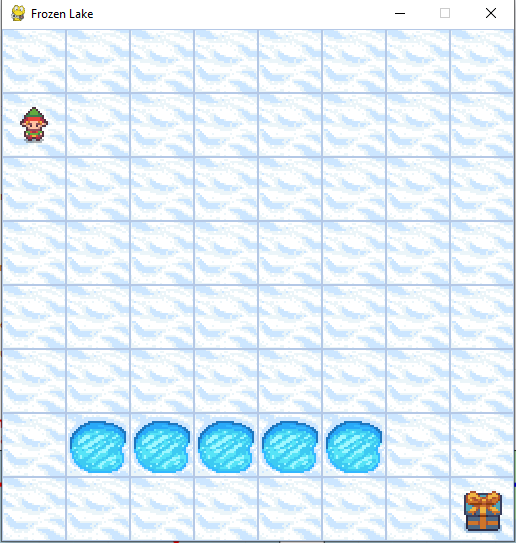

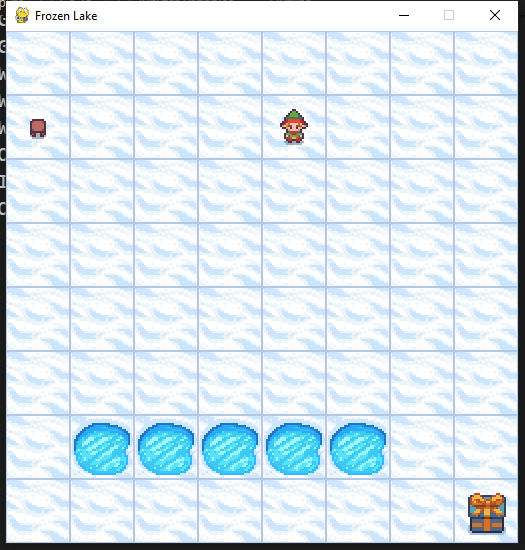

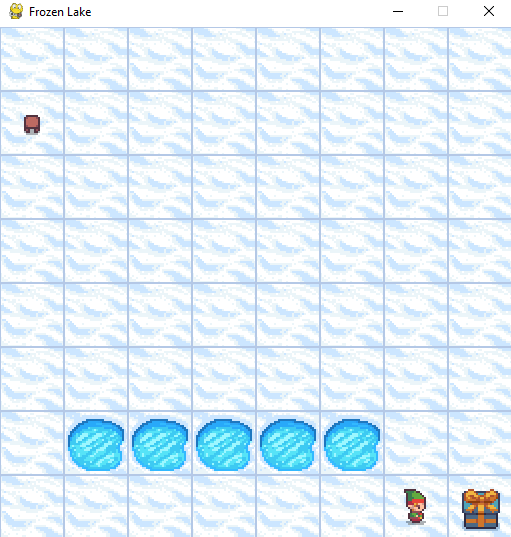